#### Name : Abhedya Shukla
#### email:  abhedya21@gmail.com

# Project InstaBot -2

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import time
from getpass import getpass
import matplotlib.pyplot as plt

In [2]:
driver = webdriver.Chrome(executable_path = "F:/chromedriver.exe")

In [3]:
driver.get("https://www.instagram.com/")

### Brief explanation of each function used in project


#### loginToIntagram:
used 1 time in project just for login purpose. Takes 3 arg: driver, username, password.


#### searchProfile:
used in almost all parts of project. Used for search a profile and open it. 2 arg: driver, username.


#### get10Profiles:
returns a list of top 10 profile displayed when "food" is searched.


#### getTop5Followers:
returns 2 lists, one contains username and other contains there followers count. These are those 5 usernames which has most number of followers among the top 10 profiles found in previous function. 


#### dictSort:
this function is called from above function (getTop5Followers) to sort the dictionary on the basis of its values and returns 2 lists. This function is not used directly in the program.


#### postDays:
This function prints and returns number of posts these handles have done in the previous 3 days.
This return a list.

#### getContentOf10Posts:
This function scrap the content of top 10 post from these handles and stores then in a string and returns that string for finding frequency of each word.


#### likeRatio:
This function finds number of likes from top 10 post from each of the top5 profiles. Also fum sum and average of these likes and number of followers as a list.

In [130]:
# Here you will find All functions used in project

def loginToIntagram(driver, usrnam, paswrd):
    usernameBox = driver.find_element_by_name('username')
    usernameBox.send_keys(usrnam)
    passwordBox = driver.find_element_by_name('password')
    passwordBox.send_keys(paswrd)
    passwordBox.submit()
    time.sleep(2)

    
def searchProfile(driver, usrnme):
    search = driver.find_element_by_class_name('XTCLo')
    search.send_keys(usrnme)
    time.sleep(3)
    profile = driver.find_element_by_class_name('yCE8d')
    profile.click()
    
    
def get10Profiles(driver, usrid):
    search = driver.find_element_by_class_name('XTCLo')
    search.send_keys(usrid)
    time.sleep(3)
    username = driver.find_elements_by_class_name('Ap253')
    lstOfUser = []
    time.sleep(2)
    for x in range(10):
            lstOfUser.append(username[x].text)
    search.clear()
    return lstOfUser

def getTop5Followers(driver, lst):
    dict = {}
    for x in lst:
        searchProfile(driver, x)
        time.sleep(3)
        followers = driver.find_elements_by_class_name('g47SY')[1]
        No_of_Followers = followers.get_attribute('title')
        No_of_Followers = No_of_Followers.replace(',', "")
        dict[x] = int(No_of_Followers)
    l1, l2 = dictSort(dict)
    return l1, l2
        
def dictSort(d):
    lst = sorted(d, key=d.get, reverse=True)   
    count=0
    l1 = []
    l2 = []
    for x in lst:
        count+=1
        print(x, ": ", d[x])
        l1.append(x)
        l2.append(d[x])
        if count>=5:
            break
    return l1, l2


def postDays(driver, lst):
    l = []
    for x in lst:
        searchProfile(driver, x)
        time.sleep(2)
        count = 0
        firstPost = driver.find_element_by_class_name('_9AhH0')
        firstPost.click()
        time.sleep(3)
        while True:
            uploadDay = driver.find_element_by_class_name('Nzb55')
            #print(uploadDay.text)
            if uploadDay.text[1]=="h":
                count+=1
                driver.find_element_by_class_name('_65Bje').click()
                time.sleep(3)
            else:
                dayAgo = int(uploadDay.text[:1])
                if dayAgo <= 3:
                    count+=1
                    driver.find_element_by_class_name('_65Bje').click()
                    time.sleep(3)
                else:
                    print(x, ": ", count)
                    driver.find_element_by_css_selector("svg[aria-label='Close']").click()
                    time.sleep(2)
                    break
        l.append(count)
    return l


def getContentOf10Posts(driver, top5, s = ""):
    for username in top5:
        searchProfile(driver, username)
        firstPost = driver.find_element_by_class_name('_9AhH0')
        firstPost.click()
        time.sleep(3)
        for x in range(10):
            content = driver.find_element_by_class_name('C4VMK')
            s = s + " " + content.text.replace("\n", " ")
            time.sleep(1)
            nextPost = driver.find_element_by_class_name('_65Bje')
            nextPost.click()
            time.sleep(3)
        driver.find_element_by_css_selector("svg[aria-label='Close']").click()
    return s


def likeRatio(driver, top5):
    avgLike = []
    followerList = []
    for username in top5:
        searchProfile(driver, username)
        time.sleep(2)
        followers = driver.find_elements_by_class_name('g47SY')[1]
        No_of_Followers = followers.get_attribute('title')
        No_of_Followers = int(No_of_Followers.replace(',', ""))
        firstPost = driver.find_element_by_class_name('_9AhH0')
        firstPost.click()
        time.sleep(3)
        likeSum = 0
        for x in range(10):
            try:
                like = driver.find_element_by_xpath('//div[@class = "Nm9Fw"]/button/span')
                currentPostLike = int(like.text.replace(",",""))
            except NoSuchElementException:
                views = driver.find_element_by_xpath('//span[@class = "vcOH2"]/span')
                views.click()
                time.sleep(1)
                like = driver.find_element_by_xpath('//div[@class = "vJRqr"]/span')
                currentPostLike = int(like.text.replace(",",""))
                driver.execute_script("arguments[0].click();", views)

            
            likeSum = likeSum + currentPostLike
            time.sleep(1)
            nextPost = driver.find_element_by_class_name('_65Bje')
            nextPost.click()
            time.sleep(3)
                
                
        driver.find_element_by_css_selector("svg[aria-label='Close']").click()
        avgLike.append(likeSum/10)
        followerList.append(No_of_Followers)
    return avgLike, followerList

## LOGIN

In [5]:
## enter your credentials
userid = input("Enter Your UserName: ")
passwrd = getpass("Enter Your Password: ")
loginToIntagram(driver, userid, passwrd)

Enter Your UserName: forinstabot
Enter Your Password: ········


In [14]:
# first 10 profile when search food
lst = get10Profiles(driver, 'food')
print("Given below is the list of top 10 accounts under 'Food' search: ")
print(lst)

Given below is the list of top 10 accounts under 'Food' search: 
['foodtalkindia', 'dilsefoodie', 'yourfoodlab', 'foodie_incarnate', 'anileo1794', 'food_lunatic', 'food', 'food_toheal_yoursoul', 'foodinsider', 'buzzfeedfood']


### Question 1

Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
2. Now Find the number of posts these handles have done in the previous 3 days.
3. Depict this information using a suitable graph.

Top 5 username and there follwers count in 'Food'
buzzfeedfood :  3650448
foodinsider :  2178821
yourfoodlab :  1428468
dilsefoodie :  631681
foodtalkindia :  302544


Graph


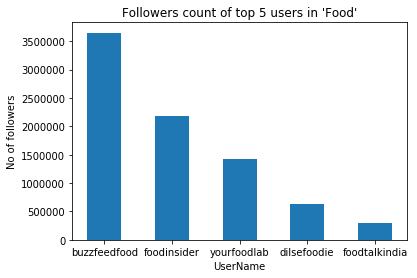

In [15]:
# ques 1.1
# top 5 profile having highest number of followers
print("Top 5 username and there follwers count in 'Food'")
top5, value = getTop5Followers(driver, lst)
print("\n")
print("Graph")
plt.bar(top5, value,width=0.5)
plt.ylabel("No of followers")
plt.xlabel("UserName")
plt.title("Followers count of top 5 users in 'Food'")
plt.show()

Top 5 username and there posts count in last 3 days'
buzzfeedfood :  1
foodinsider :  4
yourfoodlab :  4
dilsefoodie :  5
foodtalkindia :  3


Graph


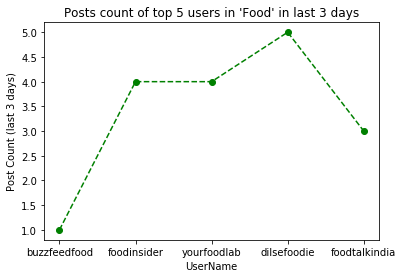

In [16]:
# ques 1.2
# number of posts these handles have done in the previous 3 days.
print("Top 5 username and there posts count in last 3 days'")
count = postDays(driver, top5)
print("\n")

# ques 1.3
# Depict this information using a suitable graph.
print("Graph")
plt.plot(top5, count, "go--")
plt.ylabel("Post Count (last 3 days)")
plt.xlabel("UserName")
plt.title("Posts count of top 5 users in 'Food' in last 3 days")
plt.show()

### Question 2

Your friend also needs a list of hashtags that he should use in his posts.
1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
3. Create a csv file with two columns : the word and its frequency
4. Now, find the hashtags that were most popular among these bloggers
5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [19]:
# ques 2.1
#  and scrape the content of the first 10 posts of each handle
allContent = getContentOf10Posts(driver, top5)
allContent
# storing all content of top 10 posts from tpo 5 handles in a single string
# Its huge string but it makes easier to count words frequency

' buzzfeedfood Verified Drool alert! Get ready for some seriously mouth-watering meals with Tasty Savory Seasoning Mix created by McCormick. Get cooking with your very own spices by clicking the link in bio! 3d buzzfeedfood Verified You\'re one meal away from your future. Link in bio 💻 4d buzzfeedfood Verified Bon appétit! Link in bio 💻 4d buzzfeedfood Verified Schnitzel or soup dumplings? You decide. Link in bio 🔗 5d buzzfeedfood Verified "Chicano Eats" is as much a piece of art as it is a cookbook. Link in bio 👆 5d buzzfeedfood Verified Would you eat a bowl of chili on your first date? Link in bio 👀 5d buzzfeedfood Verified Game. Changer. Link in bio 👆 5d buzzfeedfood Verified Cookware staples, gadgets reviewers swear by, and delicious treats, all at #PrimeDay prices that are truly ::chef’s kiss:: Link in bio ✨ (via @buzzfeedshopping) 5d buzzfeedfood Verified It\'s undoubtedly confusing, but these little tips will help. Link in bio 🧐 6d buzzfeedfood Verified Calling all ketchup lover

In [37]:
# ques 2.2
# Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
import operator
str_list = allContent.replace(".", "").split()
unique_words = list(set(str_list))
word_count = []
dict = {}
for words in unique_words : 
    word_count.append(str_list.count(words))
for i in range(len(word_count)):
    dict[unique_words[i]] = word_count[i]
sorted_dict = sorted(dict.items(), key=operator.itemgetter(1), reverse = True)
#printing top10 just for overview 
for i in range(10):
    print(sorted_dict[i][0], ": ", sorted_dict[i][1])

the :  88
and :  87
a :  70
to :  63
in :  51
Verified :  50
is :  36
on :  35
for :  34
of :  33


In [41]:
# ques 2.3
# creating CSV file
import pandas as pd
df = pd.DataFrame(list(zip(unique_words, word_count)), columns =['Word', 'Count']) 
df.to_csv('Instabot1_wordCount.csv')
df.head() 

,Word,Count
0,#atlanta,1
1,three,3
2,😋😋,1
3,pizza,8
4,section?,1


In [88]:
# ques 2.4
# printing Top10 most used hashtags (popular hashtags)
hashtag = df.Word
boolarr = []
for i in range (len(hashtag)):
    if hashtag[i][0] == "#":
        boolarr.append(i)
dict = {"Hashtag": df.Word[boolarr], "Frequency": df.Count[boolarr]}
df1 = pd.DataFrame(dict)
df1.sort_values("Frequency", ascending = False, inplace = True)
df1.reset_index(drop=True,inplace=True)
print(df1[:10])

           Hashtag  Frequency
0     #dilsefoodie          9
1        #foodporn          7
2     #sanjyotkeer          7
3      #streetfood          7
4          #foodie          6
5  #recipeoftheday          5
6     #comfortfood          5
7            #food          5
8          #recipe          5
9         #recipes          4


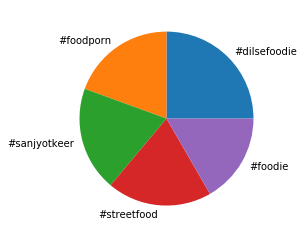

In [92]:
# ques 2.5
#Pie chart
hastTag = list(df1.Hashtag[:5])
counts =  list(df1.Frequency[:5])
plt.pie(counts, labels=hastTag)
plt.show()

### Question 3

You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:
1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
2. Calculate the average likes for a handle.
3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
4. Create a bar graph to depict the above obtained information.

In [141]:
# ques 3.1, 3.2
# in 3.1 the list of he likes of the top 10 posts of the 5 handles is not printed 
# not asked to print this list so it is just found out in the function below and avglike has been calculated and printed
avgLike, totalFollowers = likeRatio(driver, top5) # likes and avglikes are found in this function
ratio = []
# ques 3.3
for i in range(len(top5)):
    ratio.append(totalFollowers[i]/avgLike[i])
for i in range(len(top5)):
    print(top5[i],": ")
    print("avgLike: ", avgLike[i]) 
    print("No_of_Followers: ", totalFollowers[i])
    print("followers:like Ratio: ", ratio[i])
    print("\n")

buzzfeedfood : 
avgLike:  1597.4
No_of_Followers:  3649978
followers:like Ratio:  2284.9492926004755


foodinsider : 
avgLike:  7814.0
No_of_Followers:  2178831
followers:like Ratio:  278.83683132838496


yourfoodlab : 
avgLike:  25238.6
No_of_Followers:  1429812
followers:like Ratio:  56.65179526598148


dilsefoodie : 
avgLike:  10203.3
No_of_Followers:  632675
followers:like Ratio:  62.00689972851921


foodtalkindia : 
avgLike:  557.9
No_of_Followers:  302565
followers:like Ratio:  542.3283742606202




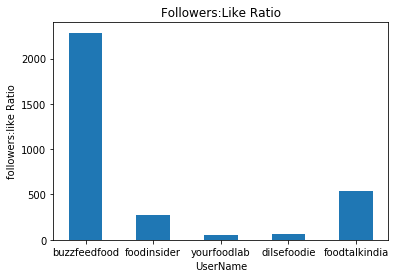

In [142]:
# ques 3.4
plt.bar(top5, ratio,width=0.5)
plt.ylabel("followers:like Ratio")
plt.xlabel("UserName")
plt.title("Followers:Like Ratio")
plt.show()